In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

df = pd.read_parquet("data/bergingspercentage_rucphen_parquet/RUC0011_WTH_RIO.Bergingspercentage.parquet")
df_metadata = pd.read_parquet("data/bergingspercentage_rucphen_parquet/RUC0011_WTH_RIO.Bergingspercentage.metadata.parquet")

In [2]:
# check if df has nan values
print(df.isna().sum())
print(len(df))
print(df)

Date            0
Time            0
Value [m³/h]    0
dtype: int64
616045
              Date      Time  Value [m³/h]
0       01-01-2018  00:00:00       100.000
1       01-01-2018  00:05:00       100.000
2       01-01-2018  00:10:00       100.000
3       01-01-2018  00:15:00       100.000
4       01-01-2018  00:20:00       100.000
...            ...       ...           ...
616040  10-11-2023  00:40:00         0.814
616041  10-11-2023  00:45:00         1.106
616042  10-11-2023  00:50:00         1.399
616043  10-11-2023  00:55:00         1.692
616044  10-11-2023  01:00:00         1.985

[616045 rows x 3 columns]


In [3]:
# get records start 16 april 2023 07:30:00 until 16 april 2023 08:30:00
df[(df['Date'] == '16-04-2023') & (df['Time'] == '08:00:00')]

,Date,Time,Value [m³/h]
556224,16-04-2023,08:00:00,2.387


In [4]:
df_metadata.head(15)

,Key,Value
0,Station Site,Kenbelstraat
1,Station Name,Niveau Riool
2,Station Number,RUC0011_WTH_RIO
3,LocalX,99486
4,LocalY,396923
6,Parameter Name,Bergingspercentage
7,Parameter Type,WNS12107
8,Parameter Type Name,WATHTE [%] [PLAATSLR] [AW]
9,Time series Name,ContinueBerekening.F
10,Time series Unit,m³/h


In [5]:
# Data cleaning/preperation
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d-%m-%Y %H:%M:%S")
df.drop(columns= 'Date', inplace= True)

# Rename columns
df = df.rename(columns={'Value [m³/h]': 'percentage'})
# Define the desired order of columns
desired_order = ['timestamp', 'percentage']

# Reorder columns using reorder_levels
df = df[desired_order]
df

,timestamp,percentage
0,2018-01-01 00:00:00,100.000
1,2018-01-01 00:05:00,100.000
2,2018-01-01 00:10:00,100.000
3,2018-01-01 00:15:00,100.000
4,2018-01-01 00:20:00,100.000
...,...,...
616040,2023-11-10 00:40:00,0.814
616041,2023-11-10 00:45:00,1.106
616042,2023-11-10 00:50:00,1.399
616043,2023-11-10 00:55:00,1.692


In [6]:
df[df.duplicated(['timestamp'])]

,timestamp,percentage


In [7]:
# check if timestamp exists in df timestamp column
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2023-11-10 01:00:00')
delta = pd.Timedelta(minutes=5)

while start_date <= end_date:
    if start_date not in df['timestamp'].values:
        print(start_date)
    start_date += delta

# geen gaten gevonden in de data

In [8]:
# give me all records from 16 april 2023 07:30:00 until 16 april 2023 08:30:00
df[(df['timestamp'] >= '2023-04-16 07:30:00') & (df['timestamp'] <= '2023-04-16 08:30:00')]

,timestamp,percentage
556218,2023-04-16 07:30:00,2.948
556219,2023-04-16 07:35:00,2.802
556220,2023-04-16 07:40:00,2.655
556221,2023-04-16 07:45:00,2.632
556222,2023-04-16 07:50:00,2.632
556223,2023-04-16 07:55:00,2.632
556224,2023-04-16 08:00:00,2.387
556225,2023-04-16 08:05:00,2.095
556226,2023-04-16 08:10:00,1.802
556227,2023-04-16 08:15:00,1.999


In [16]:
df["percentage"].max()

100.0

In [17]:
df["percentage"].min()

0.0

c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

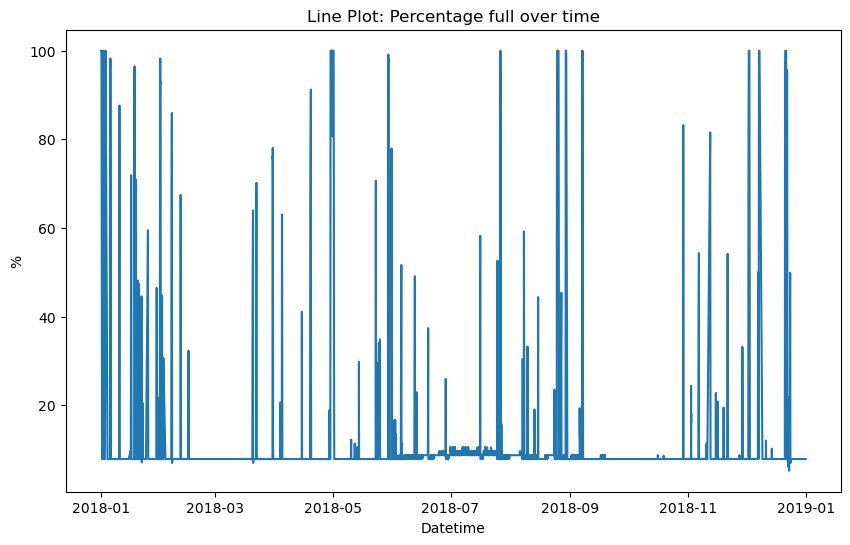

c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

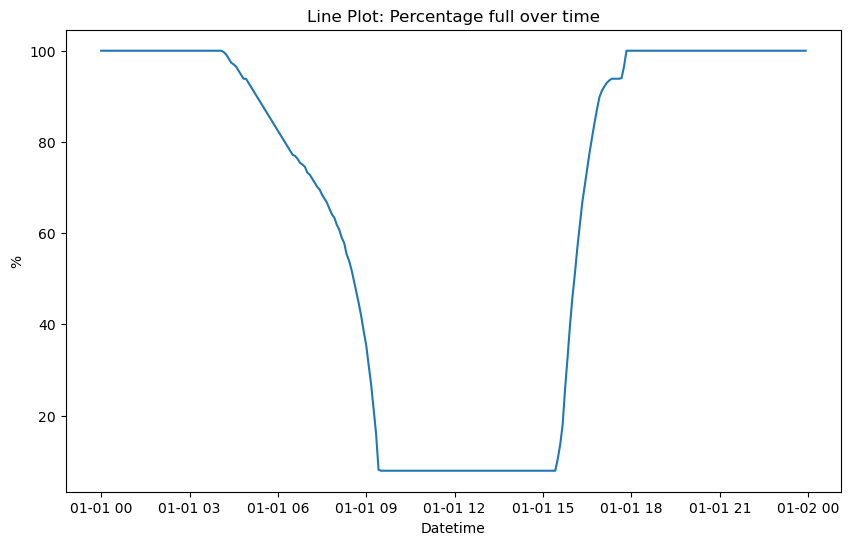

In [18]:
def create_plot(df, x,xlabel, y, ylabel, title):
    # Create a line plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x = x, y = y)

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot
    plt.show()

df_2018 = df[df['timestamp'].dt.year == 2018]
df_jan_2018 = df[(df['timestamp'].dt.year == 2018) & (df['timestamp'].dt.month == 1) & (df['timestamp'].dt.day == 1)]

create_plot(df_2018, 'timestamp','Datetime', 'percentage','%', 'Line Plot: Percentage full over time')
create_plot(df_jan_2018, 'timestamp','Datetime', 'percentage','%', 'Line Plot: Percentage full over time')

In [19]:
print(len(df))
print(df.isna().sum())

616045
timestamp     0
percentage    0
dtype: int64


In [20]:
df_weather = pd.read_parquet("try_map/polygon_1663.parquet")
df_weather.sort_values(by=['timestamp'], inplace=True)
df_weather['precipitation'] = df_weather['precipitation'].apply(lambda x: 0 if x < 0 else x)
print(df_weather.isna().sum())
print(len(df_weather))
df_weather

timestamp        0
precipitation    0
dtype: int64
516646


,timestamp,precipitation
0,2019-01-01 00:00:00,0.000000
1,2019-01-01 00:05:00,0.000000
2,2019-01-01 00:10:00,0.000000
3,2019-01-01 00:15:00,0.000000
4,2019-01-01 00:20:00,0.000000
...,...,...
676924,2023-12-11 08:30:00,0.020020
676925,2023-12-11 08:35:00,0.039978
676926,2023-12-11 08:40:00,0.020020
676927,2023-12-11 08:45:00,0.000000


In [21]:
# check if df_weather has duplicate timestamps
df_weather[df_weather.duplicated(['timestamp'])]

,timestamp,precipitation


In [22]:
# get record df weather of 2022-12-15 00:00:00
df_weather[df_weather['timestamp'] == '2022-12-15 00:00:00']

,timestamp,precipitation
412940,2022-12-15,0.0


In [23]:
# give me all records from 2023-05-23 00:45:00 until 2023-05-23 00:45:00 in df_weather
df_weather[(df_weather['timestamp'] >= '2023-05-23 00:45:00') & (df_weather['timestamp'] <= '2023-05-23 02:45:00')]

,timestamp,precipitation
510897,2023-05-23 00:45:00,0.0
510898,2023-05-23 00:50:00,0.0
510899,2023-05-23 00:55:00,0.0
510900,2023-05-23 01:00:00,0.0
510901,2023-05-23 01:05:00,0.0
510902,2023-05-23 01:10:00,0.0
510903,2023-05-23 01:15:00,0.0
510904,2023-05-23 01:20:00,0.0
510905,2023-05-23 01:25:00,0.0
510906,2023-05-23 01:30:00,0.0


In [24]:
# give me all records from 16 april 2023 07:30:00 until 16 april 2023 08:30:00 in df_weather
df_weather[(df_weather['timestamp'] >= '2023-04-16 08:00:00') & (df_weather['timestamp'] <= '2023-04-17 07:55:00')]

,timestamp,precipitation
489118,2023-04-16 08:00:00,0.0
489119,2023-04-16 08:05:00,0.0
489120,2023-04-16 08:10:00,0.0
489121,2023-04-16 08:15:00,0.0
489122,2023-04-16 08:20:00,0.0
...,...,...
489425,2023-04-17 07:35:00,0.0
489426,2023-04-17 07:40:00,0.0
489427,2023-04-17 07:45:00,0.0
489428,2023-04-17 07:50:00,0.0


In [25]:
print(df_weather.max())
print(df_weather.min())

timestamp        2023-12-11 08:50:00
precipitation               7.170013
dtype: object
timestamp        2019-01-01 00:00:00
precipitation                    0.0
dtype: object


In [26]:
merged_df = pd.merge(df_weather, df, on='timestamp', how='inner')
# merged_df.to_parquet("data/rucphen_precipitation.parquet")
merged_df.head(10)

,timestamp,precipitation,percentage
0,2019-01-01 00:00:00,0.0,7.895
1,2019-01-01 00:05:00,0.0,7.895
2,2019-01-01 00:10:00,0.0,7.895
3,2019-01-01 00:15:00,0.0,7.895
4,2019-01-01 00:20:00,0.0,7.895
5,2019-01-01 00:25:00,0.0,7.895
6,2019-01-01 00:30:00,0.0,7.895
7,2019-01-01 00:35:00,0.0,7.895
8,2019-01-01 00:40:00,0.0,7.895
9,2019-01-01 00:45:00,0.0,7.895


In [27]:
# check if timestamp exists in merged_df timestamp column
start_date = pd.to_datetime('2019-01-01 00:00:00')
end_date = pd.to_datetime('2023-11-10 01:00:00')
delta = pd.Timedelta(minutes=5)

while start_date <= end_date:
    if start_date not in merged_df['timestamp'].values:
        print(start_date)
    start_date += delta

# geen gaten gevonden in de data

2019-01-01 13:20:00
2019-01-02 04:25:00
2019-01-02 16:55:00
2019-01-02 18:00:00
2019-01-02 19:50:00
2019-01-03 11:00:00
2019-01-04 00:00:00
2019-01-04 03:25:00
2019-01-05 04:55:00
2019-01-08 04:15:00
2019-01-09 02:10:00
2019-01-10 11:00:00
2019-01-10 23:05:00
2019-01-11 20:00:00
2019-01-11 20:20:00
2019-01-11 20:45:00
2019-01-11 22:05:00
2019-01-12 06:30:00
2019-01-12 10:30:00
2019-01-12 11:15:00
2019-01-12 12:05:00
2019-01-12 12:15:00
2019-01-12 12:30:00
2019-01-12 12:35:00
2019-01-12 12:50:00
2019-01-12 14:10:00
2019-01-12 14:15:00
2019-01-12 14:25:00
2019-01-12 14:35:00
2019-01-12 14:40:00
2019-01-12 15:25:00
2019-01-12 15:35:00
2019-01-12 15:50:00
2019-01-12 16:05:00
2019-01-12 16:35:00
2019-01-12 16:55:00
2019-01-12 17:05:00
2019-01-12 17:25:00
2019-01-12 20:35:00
2019-01-12 20:40:00
2019-01-12 21:10:00
2019-01-12 21:25:00
2019-01-12 22:20:00
2019-01-13 01:25:00
2019-01-13 03:30:00
2019-01-13 04:50:00
2019-01-13 06:20:00
2019-01-13 23:10:00
2019-01-14 04:20:00
2019-01-14 11:00:00


In [28]:
# check if df and df_weather have nan values
print(df.isna().sum())
print(df_weather.isna().sum())
print(merged_df.isna().sum())
print(merged_df.shape)

# get records where percentage is nan
merged_df[merged_df['percentage'].isna()]

timestamp     0
percentage    0
dtype: int64
timestamp        0
precipitation    0
dtype: int64
timestamp        0
precipitation    0
percentage       0
dtype: int64
(507888, 3)


,timestamp,precipitation,percentage


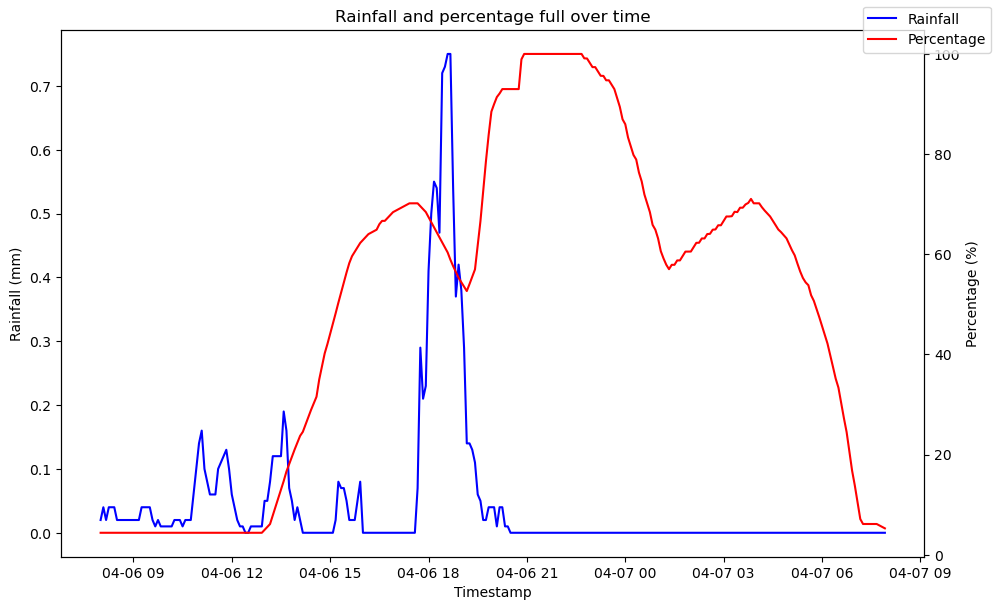

In [29]:
# Define the start and end timestamps
start_timestamp = pd.to_datetime('2023-04-06 08:00:00')
end_timestamp = pd.to_datetime('2023-04-07 08:00:00')

# Create a boolean mask for the specified time range
mask = (merged_df['timestamp'] >= start_timestamp) & (merged_df['timestamp'] < end_timestamp)

# Apply the mask to get the desired slice of the DataFrame
result_df = merged_df[mask]


# create_plot(result_df, 'timestamp','Timestamp', 'polygon_1663','mm', 'Line Plot: Rainfall over time')
# create_plot(result_df, 'timestamp','Timestamp', 'percentage','%', 'Line Plot: Percentage full over time')

# Plot with both lines
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Rainfall (mm)')
ax1.plot(result_df['timestamp'], result_df['precipitation'], color='blue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage (%)')
ax2.plot(result_df['timestamp'], result_df['percentage'], color='red')
ax2.tick_params(axis='y')

fig.legend(['Rainfall', 'Percentage'], loc='upper right')

fig.tight_layout()

plt.title('Rainfall and percentage full over time')
plt.show()

In [30]:
result_df['precipitation'].sum()

13.15008544921875

In [31]:
# check if df_weather has unique timestamps
df_weather['timestamp'].is_unique

True

In [32]:
# save merged_df to parquet
merged_df.to_parquet("data/cleaned_data/merged_df.parquet")

# save merged_df to excel
merged_df.to_excel("data/cleaned_data/merged_df.xlsx")

# save merged_df to csv
merged_df.to_csv("data/cleaned_data/merged_df.csv")